#Wrangle and Analyze Data
##Project Details
###The tasks in this project are as follows:

###Data wrangling, which consists of:
* Gathering data
* Assessing data
* Cleaning data
* Storing, analyzing, and visualizing your wrangled data
* Reporting on 
  * Data wrangling efforts 
  * Data analyses and visualizations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy 
import json
import re
from datetime import datetime
from functools import reduce
from IPython.display import Image
%matplotlib inline

#Gathering the data

##There are three datasets we are using for this project. The twitter-archive-enhanced csv dataset, image prediction and counts of retweets and favorites of tweet_id from twitter API.

In [2]:
dog_archive = pd.read_csv('twitter-archive-enhanced.csv')
dog_archive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
dog_images = pd.read_csv('image-predictions.tsv', sep = '\t')
dog_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##Twitter API

In [70]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [71]:
# use Twitter API to collect status data on tweets present in archive
tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in dog_archive['tweet_id']:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweet_id_success.append(tweet_id)
    except Exception as e:
        tweet_id_missing.append(tweet_id)
        print(f'{tweet_id}: {e}')

888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937: [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745: [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320: [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130: [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856: [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560: [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816: [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705: [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984: [{'code': 144, 'mess

Rate limit reached. Sleeping for: 801


754011816964026368: [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288: [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 801


In [72]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [6]:
# Load the Twitter API data
apiData = pd.read_json('tweet_json.txt')
apiData['tweet_id'] = apiData['id']
apiData = apiData[['tweet_id', 'favorite_count', 'retweet_count']]

In [7]:
apiData.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33796,7009
1,892177421306343426,29318,5301
2,891815181378084864,22043,3481
3,891689557279858688,36900,7217
4,891327558926688256,35275,7760


In [69]:
apiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


#Assess Data

###After gathering the data, I will programmatically and visually access the data for tidiness and quality issues.

Assessing dog_archive dataset

In [8]:
dog_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

####Obviously, there are null values in this dataset. Checking for duplicate values

In [9]:
dog_archive['tweet_id'].duplicated().sum()

0

In [10]:
dog_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


###value count for rating_numerator and rating_denominator


In [11]:
dog_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [12]:
dog_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

Dog having names less than two letters

In [13]:
dog_archive[dog_archive['name'].apply(lambda x: str(x)=='None' or len(str(x)) < 2)]['name']

5       None
7       None
12      None
24      None
25      None
        ... 
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, Length: 801, dtype: object

###Assessing tweet image predictions

In [14]:
dog_images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
dog_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Missing rows between the dog_archive and the dog_image

In [16]:
len(dog_archive) - len(dog_images)

281

Duplicates

In [17]:
dog_images.duplicated().sum()

0

Checking for duplicate images 

In [18]:
dog_images['jpg_url'].duplicated().sum()

66

###Assessing Twitter Api

In [19]:
apiData.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33796,7009
1,892177421306343426,29318,5301
2,891815181378084864,22043,3481
3,891689557279858688,36900,7217
4,891327558926688256,35275,7760


In [20]:
apiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


###Check for missing rows

In [21]:
len(dog_archive)-len(apiData)

29

Check for duplicates

In [22]:
apiData['tweet_id'].duplicated().sum()

0

##Quality issues


###Dog archive dataset
* Timestamp is of object datatype
* Name column has values that are 'None' instead of 'Nan' to show that they are null values.Some names with lowercase do not look like dog names.
* 'None' is used here instead  of 'Nan' in the doggo, floofer, pupper, and puppo columns.
* Some dog name has less than two letters as names
* Most of retweeted_status_id, retweeeted_status_userId, retweeted_status_timestamp,in_reply_to_status_id and in_reply_to_user_id are null values

###Twiter Prediction Image Dataset
* Duplicate images
* Missing rows in images dataset; There are 2075 rows instead of 2356
* Names in p1,p2 and p3 contain underscores instead of spaces

###Twitter Api data
* Missing tweets compared to the archive

##Tidiness Issues
* The four columns doggo, floofer, pupper, and puppo seems vague. It can be as a single column as a category.
* Dataframe can be merged into one.



#Cleaning Data

###Create copies of the dataframes

In [23]:
dog_archive_clean = dog_archive.copy()
dog_images_clean = dog_images.copy()
apiData_clean = apiData.copy()

##Tidiness Issues
###Define
**Tidiness issue 1: Merge the three dataframes into one**

###Code

In [24]:
df_merge = [dog_archive_clean, dog_images_clean, apiData_clean]
dogs = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), df_merge)

###Test

In [25]:
dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33796,7009
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29318,5301
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22043,3481
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36900,7217
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35275,7760


In [26]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2057 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2057 non-null   object 
 4   source                      2057 non-null   object 
 5   text                        2057 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2057 non-null   object 
 10  rating_numerator            2057 non-null   int64  
 11  rating_denominator          2057 non-null   int64  
 12  name                        2057 non-null   object 
 13  doggo                       2057 

###Define
**Tidiness issue 2: Categorizes the four columns doggo,etc which are dog stages into one column.**

###Code

In [27]:
MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [x for x in dogs.columns.tolist() if x not in MELTS_COLUMNS]

# melt the the columns into values
dogs = pd.melt(dogs, id_vars = STAY_COLUMNS, value_vars = MELTS_COLUMNS, 
                         var_name = 'stages', value_name = 'dog_stage')
# delete column 'stages'
dogs = dogs.drop('stages', 1)

# sort by dog_stage then drop duplicated based on tweet_id except the last occurrence
dogs = dogs.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='last')

# replace 'None' with NaNs
dogs['dog_stage'].replace('None', np.nan, inplace = True)

# change dtype to categorical
dogs['dog_stage'] = dogs['dog_stage'].astype("category")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [28]:
dogs['dog_stage'].value_counts()

pupper     221
doggo       65
puppo       24
floofer      8
Name: dog_stage, dtype: int64

In [29]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 1980 to 6941
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2057 non-null   int64   
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   2057 non-null   object  
 4   source                      2057 non-null   object  
 5   text                        2057 non-null   object  
 6   retweeted_status_id         71 non-null     float64 
 7   retweeted_status_user_id    71 non-null     float64 
 8   retweeted_status_timestamp  71 non-null     object  
 9   expanded_urls               2057 non-null   object  
 10  rating_numerator            2057 non-null   int64   
 11  rating_denominator          2057 non-null   int64   
 12  name                        2057 non-null   object  
 13  jpg_url        

###Define
**Drop duplicate images from the table**

###Code

In [30]:
dogs['jpg_url'].duplicated().sum()

59

In [31]:
dogs.drop_duplicates(subset=['jpg_url'], keep='last', inplace=True)

###Test

In [32]:
dogs['jpg_url'].duplicated().sum()

0

###Define
**Replace the underscore issue in columns p1,p2 and p3 with space**

###Code

In [33]:
dogs['p1'].replace('_', ' ', regex=True, inplace = True)
dogs['p2'].replace('_', ' ', regex=True, inplace = True)
dogs['p3'].replace('_', ' ', regex=True, inplace = True)

###Test

In [34]:
dogs['p1']

1980            Rottweiler
1979             porcupine
1978                 goose
1977    Labrador retriever
1976       Tibetan terrier
               ...        
6678    Labrador retriever
6478            Eskimo dog
6476            Rottweiler
6185      golden retriever
6941    Labrador retriever
Name: p1, Length: 1998, dtype: object

In [35]:
dogs['p2']

1980          miniature pinscher
1979                  bath towel
1978                       drake
1977              French bulldog
1976               Irish terrier
                  ...           
6678            golden retriever
6478              Siberian husky
6476             Tibetan mastiff
6185          Labrador retriever
6941    Chesapeake Bay retriever
Name: p2, Length: 1998, dtype: object

In [36]:
dogs['p3']

1980      black-and-tan coonhound
1979                       badger
1978                          hen
1977    Staffordshire bullterrier
1976            Yorkshire terrier
                  ...            
6678                    Chihuahua
6478                     malamute
6476      black-and-tan coonhound
6185                      redbone
6941             golden retriever
Name: p3, Length: 1998, dtype: object

###Define
**Drop the retweeted_status_id, retweeeted_status_userId, retweeted_status_timestamp,in_reply_to_status_id and in_reply_to_user_id**

###Code

In [37]:
dogs = dogs.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp','in_reply_to_status_id', 
              'in_reply_to_user_id'], 
                       axis=1)

###Test

In [39]:
dogs.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'favorite_count', 'retweet_count', 'dog_stage'],
      dtype='object')

###Define
**Convert Datatime stamp from string to datetime format**

###Code

In [40]:
dogs['timestamp'] = pd.to_datetime(dogs['timestamp'])

###Test

In [41]:
dogs['timestamp'].dtype

datetime64[ns, UTC]

###Define
**Solve the issues with name column**

###Test

In [42]:
lowercase = []
for names in dogs['name']:
    if names[0].islower() and names not in lowercase:
        lowercase.append(names)
print(lowercase)

['a', 'an', 'quite', 'the', 'such', 'getting', 'actually', 'infuriating', 'very', 'light', 'space', 'just', 'by', 'officially', 'incredibly', 'one', 'my', 'this', 'unacceptable', 'not', 'his', 'all']


In [43]:
#Replace the lowercase names with 'Nan'
dogs['name'].replace(lowercase, np.nan, inplace = True)

# replace 'None' with NaN
dogs['name'].replace('None', np.nan, inplace = True)

###Test

In [44]:
lowercase[0] in dogs['name']

False

###Define
**Fix issues with the ratings**

###Code

Print issue where the rating is in decimal

In [45]:
decimal = dogs[dogs['text'].str.contains(r"(\d+\.\d*\/\d+)")]
decimal[['tweet_id', 'rating_numerator', 'text']].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array([[883482846933004288, 5,
        'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'],
       [680494726643068929, 26,
        'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'],
       [786709082849828864, 75,
        "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"],
       [778027034220126208, 27,
        "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"]],
      dtype=object)

In [46]:
ratings_with_decimals_text = []
ratings_with_decimals_index = []
ratings_with_decimals = []

for i, text in dogs['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        ratings_with_decimals_text.append(text)
        ratings_with_decimals_index.append(i)
        ratings_with_decimals.append(re.search('\d+\.\d+', text).group())
# replace incorrect rating with correct decimal rating in numerator from text
for i in range(len(ratings_with_decimals)):
    dogs.loc[ratings_with_decimals_index[i],'rating_numerator'] = float(ratings_with_decimals[i])
# add new 'rating' column by dividing rating_numerator by rating_denominator
dogs['rating'] = dogs['rating_numerator'] / dogs['rating_denominator']

###Test

In [47]:
decimal = dogs[dogs['text'].str.contains(r"(\d+\.\d*\/\d+)")]
dogs[['tweet_id', 'rating_numerator', 'text']].values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


array([[667435689202614272, 12.0,
        'Ermergerd 12/10 https://t.co/PQni2sjPsm'],
       [667437278097252352, 10.0,
        'Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx'],
       [667443425659232256, 6.0,
        'Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N'],
       ...,
       [825535076884762624, 14.0,
        "Here's a very loving and accepting puppo. Appears to have read her Constitution well. 14/10 would pat head approvingly https://t.co/6ao80wIpV1"],
       [889531135344209921, 13.0,
        "This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq"],
       [751132876104687617, 10.0,
        "This is Cooper. He's just so damn happy. 10/10 what's your secret puppo? https://t.co/yToDwVXEpA"]],
      dtype=object)

In [48]:
dogs['rating']

1980    1.2
1979    1.0
1978    0.6
1977    1.1
1976    0.7
       ... 
6678    1.2
6478    1.2
6476    1.4
6185    1.3
6941    1.0
Name: rating, Length: 1998, dtype: float64

###Define
**Remove other columns which are uneccessary**

In [49]:
dogs.drop(['source','img_num'], axis=1, inplace=True)

###Test

In [50]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1998 entries, 1980 to 6941
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1998 non-null   int64              
 1   timestamp           1998 non-null   datetime64[ns, UTC]
 2   text                1998 non-null   object             
 3   expanded_urls       1998 non-null   object             
 4   rating_numerator    1998 non-null   float64            
 5   rating_denominator  1998 non-null   int64              
 6   name                1343 non-null   object             
 7   jpg_url             1998 non-null   object             
 8   p1                  1998 non-null   object             
 9   p1_conf             1998 non-null   float64            
 10  p1_dog              1998 non-null   bool               
 11  p2                  1998 non-null   object             
 12  p2_conf             1998 non-nu

####Save this clean dataframe to a csv file

In [53]:
dogs.to_csv('twitter_archive_master.csv')

#Visualization

In [54]:
df_dogs = pd.read_csv('twitter_archive_master.csv')

In [55]:
df_dogs.head()

,Unnamed: 0,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating
0,1980,667435689202614272,2015-11-19 20:14:03+00:00,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12.0,10,NaN,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,Rottweiler,...,miniature pinscher,0.000450,True,black-and-tan coonhound,0.000157,True,265,76,NaN,1.2
1,1979,667437278097252352,2015-11-19 20:20:22+00:00,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10.0,10,NaN,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,porcupine,...,bath towel,0.006300,False,badger,0.000966,False,396,198,NaN,1.0
2,1978,667443425659232256,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10,NaN,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,goose,...,drake,0.006918,False,hen,0.005255,False,682,489,NaN,0.6
3,1977,667453023279554560,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,10,Cupcake,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,Labrador retriever,...,French bulldog,0.056639,True,Staffordshire bullterrier,0.054018,True,279,74,NaN,1.1
4,1976,667455448082227200,2015-11-19 21:32:34+00:00,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,10,Reese,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,Tibetan terrier,...,Irish terrier,0.054933,True,Yorkshire terrier,0.040576,True,171,53,NaN,0.7


###Rating Vs Retweet count

In [56]:
plt.style.use('ggplot')

In [57]:
df_dogs['rating'].value_counts()

1.200000      456
1.000000      420
1.100000      403
1.300000      260
0.900000      151
0.800000       95
0.700000       51
1.400000       36
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
0.975000        1
177.600000      1
0.818182        1
1.500000        1
1.350000        1
3.428571        1
1.126000        1
42.000000       1
0.636364        1
1.127000        1
Name: rating, dtype: int64

###Remove outliers

In [58]:
df_dogs = df_dogs[df_dogs['rating']<1.5]

###Rating over time

In [59]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter


# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

[Text(0, 0.5, 'Standardized Rating'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Rating over Time')]

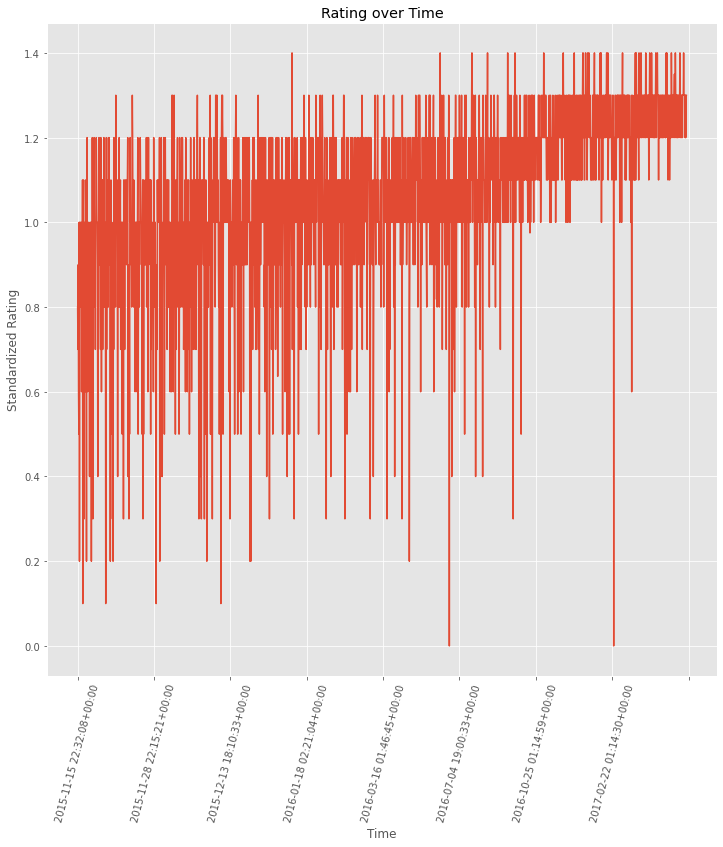

In [60]:
fig, ax = plt.subplots(figsize=(12, 12))
rating_history = df_dogs.groupby('timestamp')['rating'].mean()
date_form = DateFormatter("%y-%m")
ax.xaxis.set_major_formatter(date_form)
rating_history.plot(ax=ax, rot=75)
ax.xaxis_date()
ax.set(title = 'Rating over Time',
xlabel ='Time',ylabel ='Standardized Rating')



##Relationship between ratings and retweets

Text(0.5, 1.0, 'Rating Vs Retweet Counts')

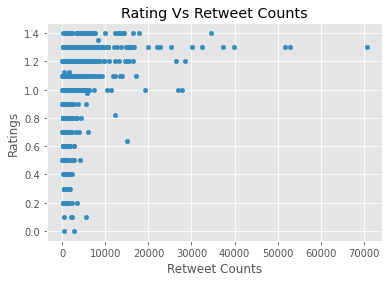

In [61]:
df_dogs.plot(x='retweet_count', y='rating', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Rating Vs Retweet Counts')

###Relationship between favorites and retweets

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


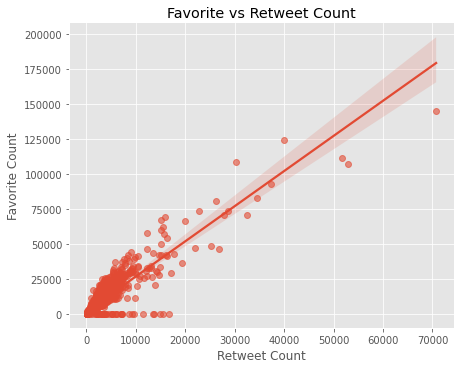

In [62]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df_dogs,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':0.6})
plt.title('Favorite vs Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

##Most Common Dog Stage

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Most common dog stage')

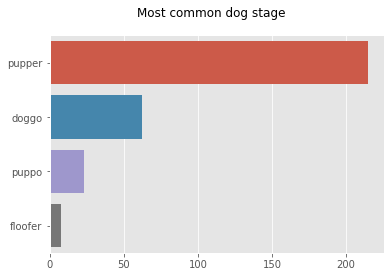

In [63]:
dog_stage = df_dogs['dog_stage'].value_counts()
sns.barplot(dog_stage.values, dog_stage.index)
plt.suptitle('Most common dog stage')

###Pupper is the most common dog stage

##Most common dog names

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Most common dog names')

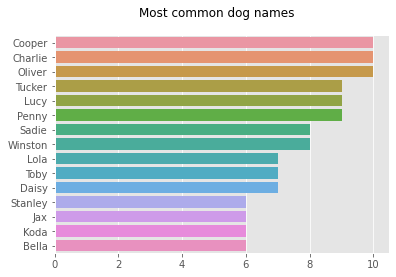

In [64]:
dog_names = df_dogs['name'].value_counts()[:15]
sns.barplot(dog_names.values,dog_names.index)
plt.suptitle('Most common dog names')

###The most common Dog names are Cooper, Charlie, Oliver, Tucker, Lucy and Penny.

###Most common Dog type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0.98, 'Most common dog type')

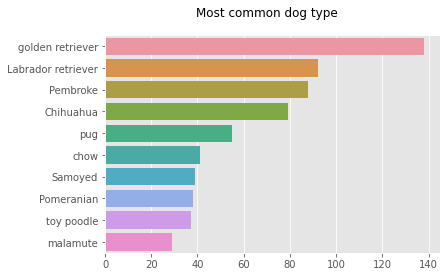

In [65]:
dog_type = df_dogs['p1'].value_counts()[:10]
sns.barplot(dog_type.values, dog_type.index)
plt.suptitle('Most common dog type')

###Most common dog type is the golden retriever, labrador retriever , penbrooke and the chihuahua.

###Sample prediction by image prediction model

In [66]:
dog = df_dogs[(df_dogs['rating'] > 1.0) & (df_dogs['dog_stage']=='pupper') & (df_dogs['name']=='Cooper')]

In [67]:
dog

,Unnamed: 0,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_stage,rating
1814,4490,814986499976527872,2016-12-31 00:08:17+00:00,This is Cooper. Someone attacked him with a sh...,https://twitter.com/dog_rates/status/814986499...,11.0,10,Cooper,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,dalmatian,...,boxer,0.000068,True,American Staffordshire terrier,0.000034,True,7250,1187,pupper,1.1
1913,5271,699801817392291840,2016-02-17 03:45:29+00:00,This is Cooper. He began to tear up when his b...,https://twitter.com/dog_rates/status/699801817...,11.0,10,Cooper,https://pbs.twimg.com/media/CbYyCMcWIAAHHjF.jpg,golden retriever,...,Irish setter,0.042428,True,Labrador retriever,0.023536,True,2781,851,pupper,1.1


This is Cooper. Someone attacked him with a sharpie. Poor pupper. 11/10 nifty tongue slip tho https://t.co/01vpuRDXQ8
Is dog?: True, type: dalmatian, confidence: 1.00, rating: 1.1, favorites: 7250, retweets: 1187


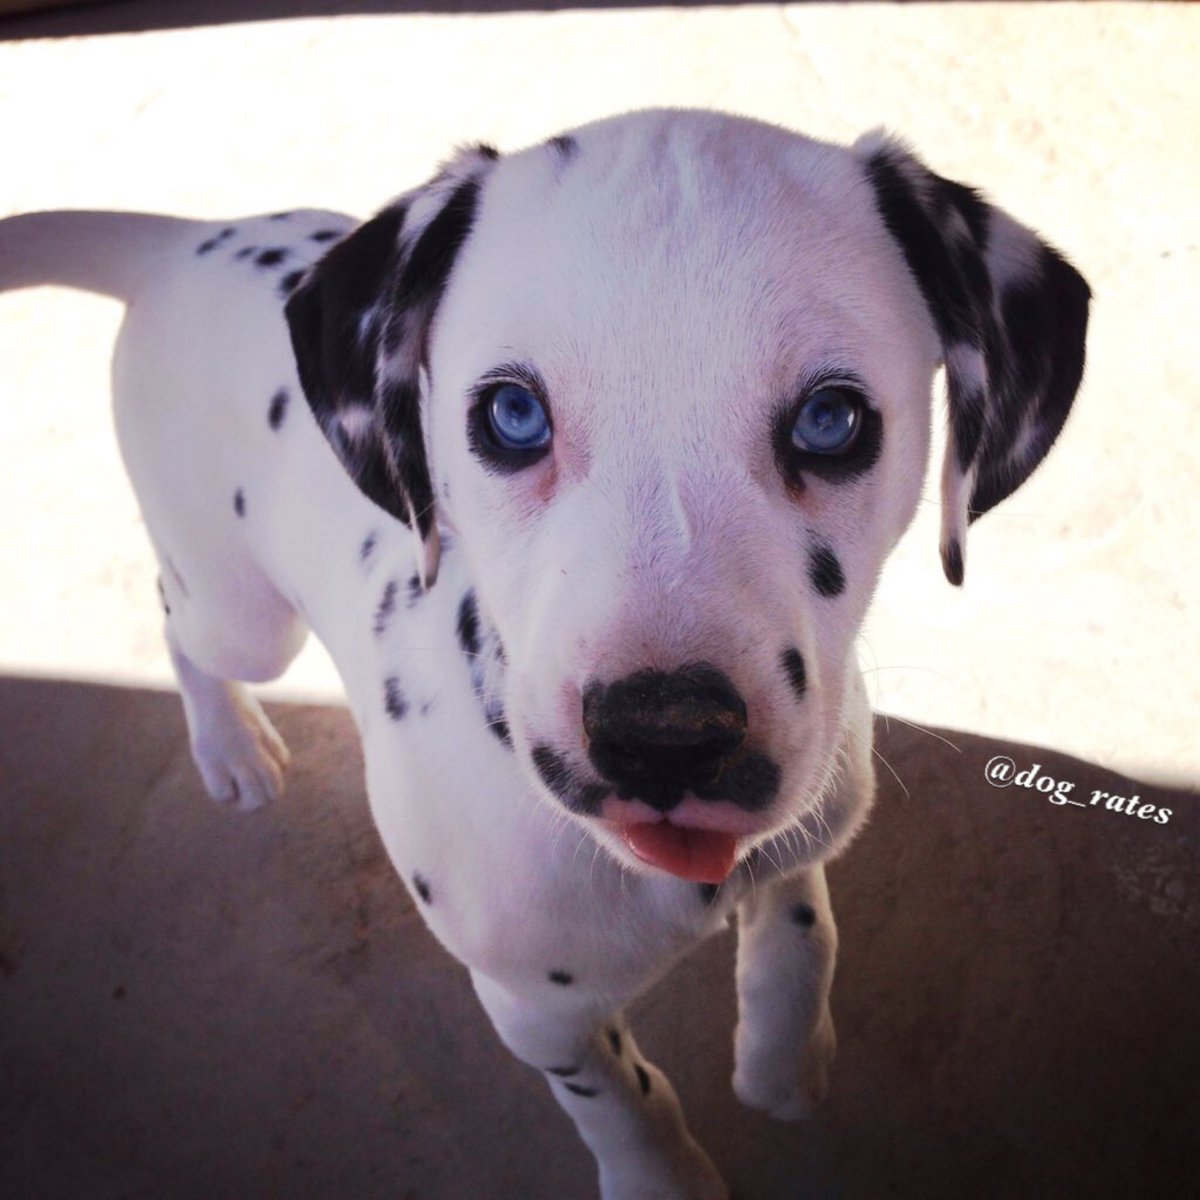

In [68]:
print(dog['text'].values[0])
print(f"Is dog?: {dog['p1_dog'].values[0]}, type: {dog['p1'].values[0]}, confidence: {dog['p1_conf'].values[0]:.2f}, rating: {dog['rating'].values[0]}, favorites: {dog['favorite_count'].values[0]}, retweets: {dog['retweet_count'].values[0]}")
Image(dog['jpg_url'].values[0])